In [2]:
%matplotlib inline

In [3]:
import math
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from brainflow.data_filter import DataFilter, AggOperations, WaveletTypes, NoiseEstimationLevelTypes, WaveletExtensionTypes, ThresholdTypes, WaveletDenoisingTypes
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, NoiseTypes, DetrendOperations, WindowOperations
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds

In [4]:
board_id = BoardIds.UNICORN_BOARD
board = BoardShim(board_id, BrainFlowInputParams())

In [5]:
channels = board.get_eeg_channels(board_id) #EEG Channels
timestamp_channel = board.get_timestamp_channel(board_id) # Timestamp channel
marker_channel = board.get_marker_channel(board_id) # Marker channel for synchronization
sampling_rate = BoardShim.get_sampling_rate(board_id) # Hz
print("Channels: ", channels)
print("Timestamp: ", timestamp_channel)
print("Marker: ", marker_channel)
print("Sampling Rate: ", sampling_rate)

Channels:  [0, 1, 2, 3, 4, 5, 6, 7]
Timestamp:  17
Marker:  18
Sampling Rate:  250


In [6]:
df = pd.read_csv('data/eeg_data1.csv', header=None)

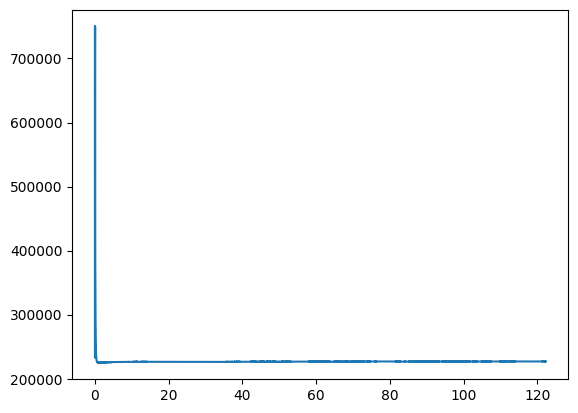

In [7]:
x_ = df[timestamp_channel]
Oz = df[channels[7]]

plt.plot(x_, Oz)

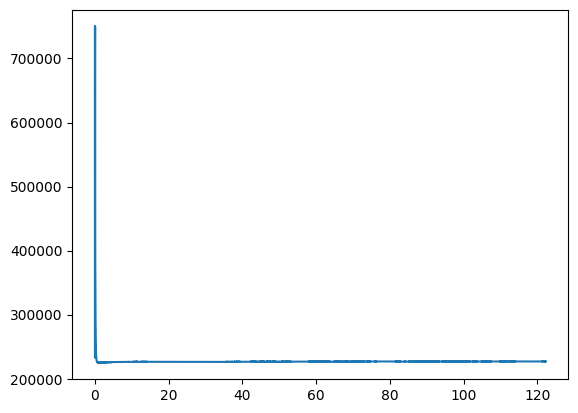

In [8]:
eeg_data = Oz.to_numpy()

# start = 2*sampling_rate
# eeg_data = eeg_data[start:]
# xs = x_[start:]-x_[start]

plt.plot(x_, eeg_data)

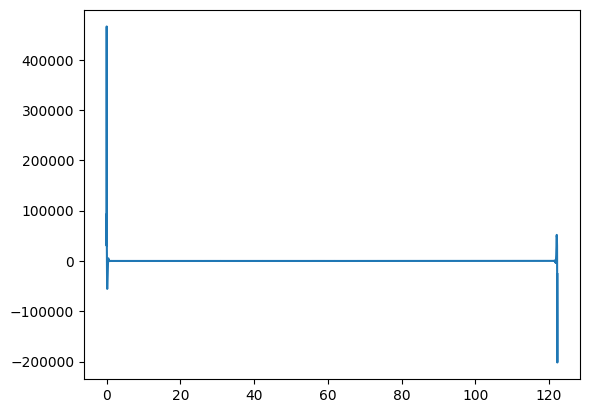

In [9]:
filtered_eeg = eeg_data
DataFilter.perform_bandpass(filtered_eeg, sampling_rate, 2.0, 30.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
DataFilter.perform_bandstop(filtered_eeg, sampling_rate, 58.0, 62.0, 5, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
# filtered_eeg = filtered_eeg[500:3000]
# xs = xs[500:3000]
plt.plot(x_, filtered_eeg)

In [25]:
first = df.loc[df[marker_channel] == 1].index[0]
print(first)

1714


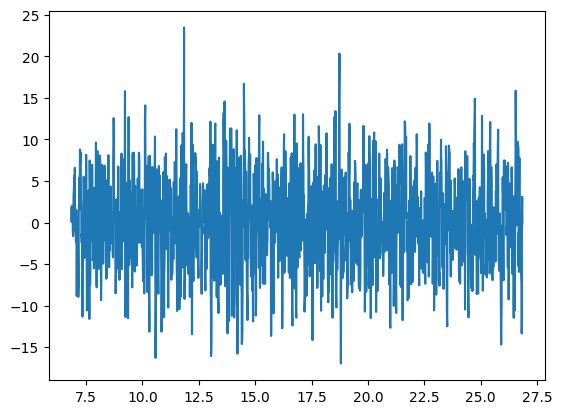

In [26]:
target_eeg_18hz = filtered_eeg[first:first+sampling_rate*20]
target_time_18hz = x_[first:first+sampling_rate*20]
plt.plot(target_time_18hz, target_eeg_18hz)

(0.0, 40.0)

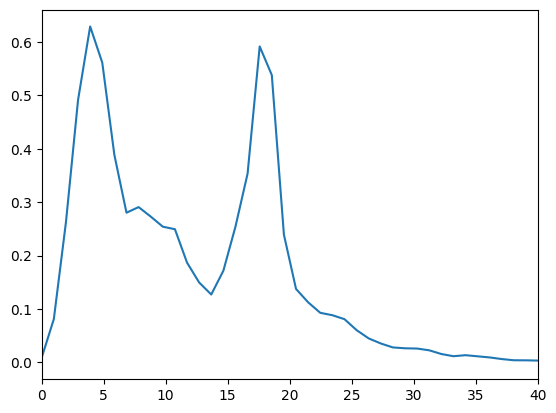

In [27]:
nfft = DataFilter.get_nearest_power_of_two(sampling_rate)
target_psd_18hz = DataFilter.get_psd_welch(target_eeg_18hz, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(target_psd_18hz[1], target_psd_18hz[0])
plt.xlim(0, 40)

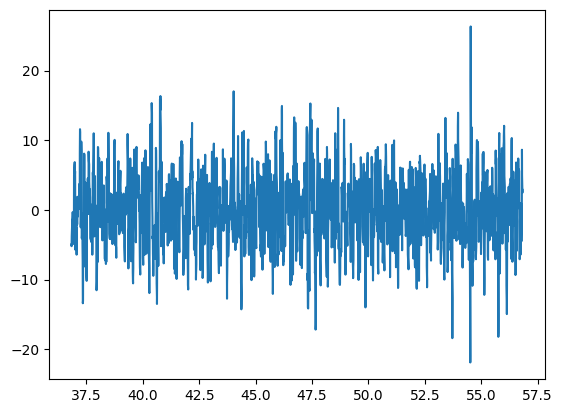

In [56]:
second = df.loc[df[marker_channel] == 3].index[0]
target_eeg_16hz = filtered_eeg[second:second+sampling_rate*20]
target_time_16hz = x_[second:second+sampling_rate*20]
plt.plot(target_time_16hz, target_eeg_16hz)

(0.0, 40.0)

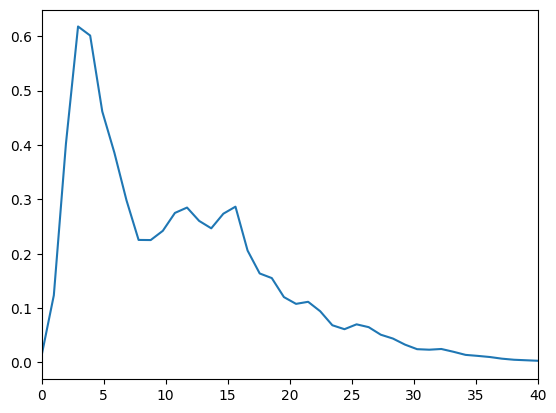

In [57]:
target_psd_16hz = DataFilter.get_psd_welch(target_eeg_16hz, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(target_psd_16hz[1], target_psd_16hz[0])
plt.xlim(0, 40)

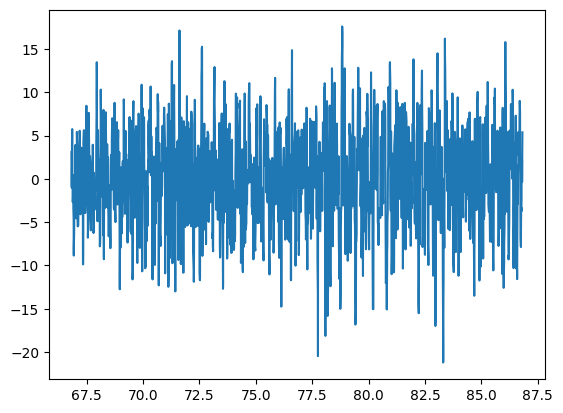

In [58]:
third = df.loc[df[marker_channel] == 5].index[0]
target_eeg_9hz = filtered_eeg[third:third+sampling_rate*20]
target_time_9hz = x_[third:third+sampling_rate*20]
plt.plot(target_time_9hz, target_eeg_9hz)

(0.0, 40.0)

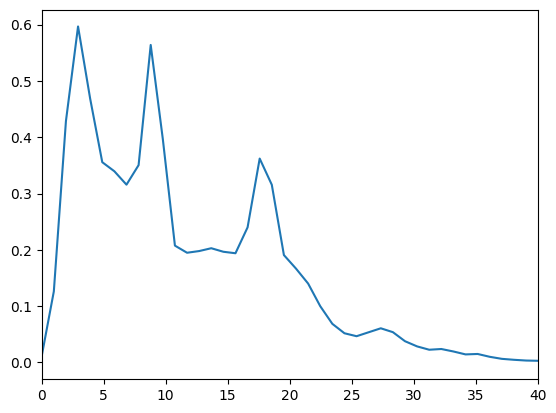

In [59]:
target_psd_9hz = DataFilter.get_psd_welch(target_eeg_9hz, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(target_psd_9hz[1], target_psd_9hz[0])
plt.xlim(0, 40)

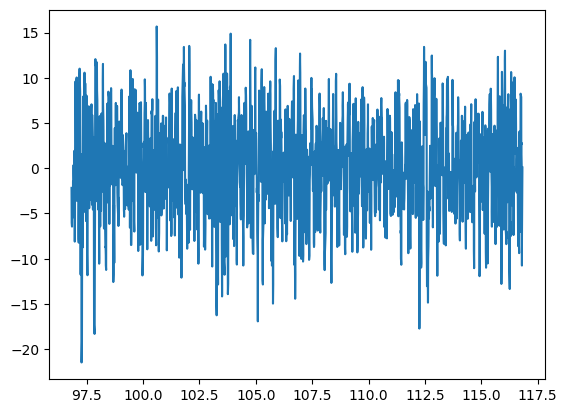

In [60]:
fourth = df.loc[df[marker_channel] == 7].index[0]
target_eeg_24hz = filtered_eeg[fourth:fourth+sampling_rate*20]
target_time_24hz = x_[fourth:fourth+sampling_rate*20]
plt.plot(target_time_24hz, target_eeg_24hz)

(0.0, 40.0)

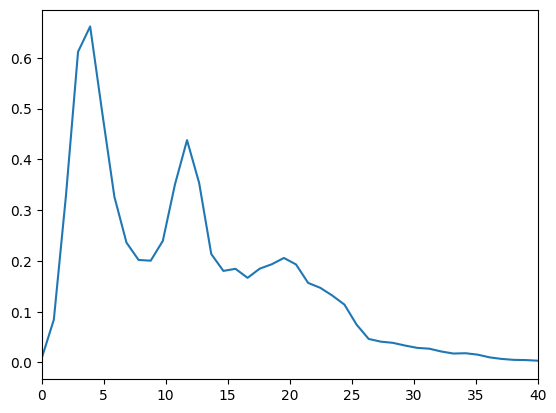

In [61]:
target_psd_24hz = DataFilter.get_psd_welch(target_eeg_24hz, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(target_psd_24hz[1], target_psd_24hz[0])
plt.xlim(0, 40)